In [1]:
import json
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import os
import random
import numpy as np

# 0. Leemos los datos

In [2]:
def read_json(path):
    with open(path) as f:
        data = json.load(f)
    return data

def leer_k_archivos_json(k):
    archivos_json = [archivo for archivo in os.listdir("data") if archivo.endswith('.json')]
    paths = random.choices(archivos_json, k=k)

    all_playlists = []
    for p in paths:
        data = read_json(f"data\{p}")
        playlist = pd.DataFrame(data['playlists'])
        all_playlists.append(playlist)
    
    playlists = pd.concat(all_playlists, ignore_index=True)
    return playlists

In [3]:
playlists = leer_k_archivos_json(15)
playlists.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,sexy time,false,696000,1501718400,186,162,1,"[{'pos': 0, 'artist_name': 'Drake', 'track_uri...",84,47014417,114,NaN
1,hype,false,696001,1481846400,41,36,1,"[{'pos': 0, 'artist_name': 'Fetty Wap', 'track...",16,9732922,31,NaN
2,country,false,696002,1435363200,32,27,1,"[{'pos': 0, 'artist_name': 'Willie Nelson', 't...",4,5650543,10,NaN
3,❗️,false,696003,1433116800,44,32,1,"[{'pos': 0, 'artist_name': 'Three Days Grace',...",3,10184354,22,NaN
4,old skool,false,696004,1508803200,120,107,1,"[{'pos': 0, 'artist_name': 'The Black Crowes',...",13,29926385,84,NaN


In [4]:
def expandir_tracks(playli):
    expanded_tracks_df = pd.DataFrame()

    # Iterar sobre cada fila y expandir los datos JSON en un dataframe
    for _, row in playli.iterrows():
        # Cargar el JSON desde la columna 'tracks'
        tracks = row['tracks']
        
        # Comprobar si 'tracks' es una cadena que necesita ser convertida de JSON
        if isinstance(tracks, str):
            try:
                tracks = json.loads(tracks)  # Cargar la cadena JSON
            except json.JSONDecodeError:
                tracks = []  # En caso de error, usar una lista vacía
        elif not isinstance(tracks, list):
            tracks = []  # Asegurar que tracks sea una lista si no es una cadena

        if tracks:
            track_data = json_normalize(tracks)
            track_data['pid'] = row['pid']  # añadimos el id de la playlist para mantener la referencia
            expanded_tracks_df = pd.concat([expanded_tracks_df, track_data], ignore_index=True)
    return expanded_tracks_df

In [5]:
expanded_tracks_df = expandir_tracks(playlists)

In [6]:
#verificamos que no existen valores nan
expanded_tracks_df.isna().sum()

pos            0
artist_name    0
track_uri      0
artist_uri     0
track_name     0
album_uri      0
duration_ms    0
album_name     0
pid            0
dtype: int64

In [7]:
# verificamos que no existen duplicados
expanded_tracks_df.duplicated().sum()

0

In [8]:
playlists.drop("tracks", axis=1, inplace=True)
playlists.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,description
0,sexy time,false,696000,1501718400,186,162,1,84,47014417,114,NaN
1,hype,false,696001,1481846400,41,36,1,16,9732922,31,NaN
2,country,false,696002,1435363200,32,27,1,4,5650543,10,NaN
3,❗️,false,696003,1433116800,44,32,1,3,10184354,22,NaN
4,old skool,false,696004,1508803200,120,107,1,13,29926385,84,NaN


In [9]:
playlists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           15000 non-null  object
 1   collaborative  15000 non-null  object
 2   pid            15000 non-null  int64 
 3   modified_at    15000 non-null  int64 
 4   num_tracks     15000 non-null  int64 
 5   num_albums     15000 non-null  int64 
 6   num_followers  15000 non-null  int64 
 7   num_edits      15000 non-null  int64 
 8   duration_ms    15000 non-null  int64 
 9   num_artists    15000 non-null  int64 
 10  description    269 non-null    object
dtypes: int64(8), object(3)
memory usage: 1.3+ MB


In [10]:
expanded_tracks_df.head()

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,pid
0,0,Drake,spotify:track:7JXZq0JgG2zTrSOAgY8VMC,spotify:artist:3TVXtAsR1Inumwj472S9r4,Jungle,spotify:album:0ptlfJfwGTy0Yvrk14JK1I,320400,If You're Reading This It's Too Late,696000
1,1,Mario,spotify:track:5xV0Czdqefft6sPDqjmFBu,spotify:artist:20s0P9QLxGqKuCsGwFsp7w,Let Me Love You,spotify:album:332c3yPZilz3OnqZKpRxl7,248825,Turning Point,696000
2,2,Miguel,spotify:track:5hJFhO9dvhJoDvUZZ9iWSw,spotify:artist:360IAlyVv4PCEVjgyMZrxK,Adorn,spotify:album:4Rvzx3X6hcDb7nty1IzVP4,193146,Kaleidoscope Dream (Deluxe Version),696000
3,3,Ginuwine,spotify:track:3pfXxHoydFRfD7IBGJTQAN,spotify:artist:7r8RF1tN2A4CiGEplkp1oP,Pony,spotify:album:3O2912EZv0FBJKZ0K5ruzK,251733,R&B: From Doo-Wop To Hip-Hop,696000
4,4,Mariah Carey,spotify:track:2H1l4JczUDbiWfQtQElB05,spotify:artist:4iHNK0tOyZPYnBU7nGAgpQ,Touch My Body,spotify:album:7JXUd8N7OXYQz981E5Jaq2,204733,E=MC²,696000


In [11]:
if (len(expanded_tracks_df["track_uri"].unique()) != len(expanded_tracks_df["track_name"].unique())):
    print("Existen canciones con el mismo nombre pero diferente URL")

Existen canciones con el mismo nombre pero diferente URL


Por lo anterior, usamos el URL para agrupar las canciones

In [12]:
expanded_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987829 entries, 0 to 987828
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   pos          987829 non-null  int64 
 1   artist_name  987829 non-null  object
 2   track_uri    987829 non-null  object
 3   artist_uri   987829 non-null  object
 4   track_name   987829 non-null  object
 5   album_uri    987829 non-null  object
 6   duration_ms  987829 non-null  int64 
 7   album_name   987829 non-null  object
 8   pid          987829 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 67.8+ MB


# 1. Analisis Exploratorio

In [13]:
playlists

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,description
0,sexy time,false,696000,1501718400,186,162,1,84,47014417,114,NaN
1,hype,false,696001,1481846400,41,36,1,16,9732922,31,NaN
2,country,false,696002,1435363200,32,27,1,4,5650543,10,NaN
3,❗️,false,696003,1433116800,44,32,1,3,10184354,22,NaN
4,old skool,false,696004,1508803200,120,107,1,13,29926385,84,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14995,80,false,260995,1507334400,36,35,1,20,9008350,28,NaN
14996,Random,false,260996,1455062400,69,58,2,50,14511014,51,NaN
14997,Mary,false,260997,1482883200,14,10,1,9,4341129,9,NaN
14998,Oct 2017,false,260998,1509062400,42,41,1,10,8571552,40,NaN


In [14]:
expanded_tracks_df

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,pid
0,0,Drake,spotify:track:7JXZq0JgG2zTrSOAgY8VMC,spotify:artist:3TVXtAsR1Inumwj472S9r4,Jungle,spotify:album:0ptlfJfwGTy0Yvrk14JK1I,320400,If You're Reading This It's Too Late,696000
1,1,Mario,spotify:track:5xV0Czdqefft6sPDqjmFBu,spotify:artist:20s0P9QLxGqKuCsGwFsp7w,Let Me Love You,spotify:album:332c3yPZilz3OnqZKpRxl7,248825,Turning Point,696000
2,2,Miguel,spotify:track:5hJFhO9dvhJoDvUZZ9iWSw,spotify:artist:360IAlyVv4PCEVjgyMZrxK,Adorn,spotify:album:4Rvzx3X6hcDb7nty1IzVP4,193146,Kaleidoscope Dream (Deluxe Version),696000
3,3,Ginuwine,spotify:track:3pfXxHoydFRfD7IBGJTQAN,spotify:artist:7r8RF1tN2A4CiGEplkp1oP,Pony,spotify:album:3O2912EZv0FBJKZ0K5ruzK,251733,R&B: From Doo-Wop To Hip-Hop,696000
4,4,Mariah Carey,spotify:track:2H1l4JczUDbiWfQtQElB05,spotify:artist:4iHNK0tOyZPYnBU7nGAgpQ,Touch My Body,spotify:album:7JXUd8N7OXYQz981E5Jaq2,204733,E=MC²,696000
...,...,...,...,...,...,...,...,...,...
987824,100,Usher,spotify:track:4356Typ82hUiFAynbLYbPn,spotify:artist:23zg3TcAtWQy7J6upgbUnj,DJ Got Us Fallin' In Love,spotify:album:6A1F3Fkq5dYeYYNkXflcTX,220800,Raymond v Raymond (Deluxe Edition),260999
987825,101,LMFAO,spotify:track:7mitXLIMCflkhZiD34uEQI,spotify:artist:3sgFRtyBnxXD5ESfmbK4dl,Party Rock Anthem,spotify:album:0D49RvtlLCKyxeDKDnBU2R,262146,Sorry For Party Rocking,260999
987826,102,Jay Sean,spotify:track:6cmm1LMvZdB5zsCwX5BjqE,spotify:artist:4pADjHPWyrlAF0FA7joK2H,Down,spotify:album:2H66HrVR1UeMlAoSXpxUnk,212506,All Or Nothing,260999
987827,103,Mike Posner,spotify:track:495O1Affo7AurEPQcvcr18,spotify:artist:2KsP6tYLJlTBvSUxnwlVWa,Cooler Than Me - Single Mix,spotify:album:2V7Z0e4YnXyNfpoK3cYIGp,213293,31 Minutes to Takeoff,260999


In [15]:
by_playlist = expanded_tracks_df.groupby('pid').agg(
    num_songs=('track_name', 'count'),  # Contamos el número de canciones por playlist
    avg_duration=('duration_ms', 'mean'),  # Calculamos la duración media de las canciones
    artists=('artist_name', lambda x: set(x)),  # Obtenemos un conjunto de artistas únicos
    songs =('track_uri', lambda x: set(x)),  # Obtenemos un conjunto de caciones únicas
    albums =('album_name', lambda x: set(x))  # Obtenemos un conjunto de albumes únicos
)

by_playlist['avg_duration'] = by_playlist['avg_duration'] / 60000 # Convertimos la duración de milisegundos a minutos
by_playlist.head()

,num_songs,avg_duration,artists,songs,albums
pid,,,,,
11000,46,3.792417,"{The Killers, One Direction, Passenger, Vitami...","{spotify:track:1TfAhjzRBWzYZ8IdUV3igl, spotify...","{August And Everything After, Glee: The Music,..."
11001,62,3.913556,"{Lupe Fiasco, 50 Cent, Biz Markie, Eminem, Chi...","{spotify:track:2Lg4kvhOrPhpGEZmSe7VAN, spotify...","{Rolling Papers, Get Rich Or Die Tryin', Sitti..."
11002,36,4.911985,"{Telekinesis, Merl Saunders, Phantogram, Risin...","{spotify:track:6VKftuH1BioMRn0LbUkv3b, spotify...","{III, Callin' out 12"", Hold My Home, II, Magni..."
11003,45,4.421719,"{Disney Characters, Bobby ""Boris"" Pickett & Th...","{spotify:track:69QHm3pustz01CJRwdo20z, spotify...","{Astro Creep: 2000 Songs Of Love, Destruction ..."
11004,48,3.826138,"{Tijuana Panthers, Sky Ferreira, Deerhoof, Boy...","{spotify:track:4lMTBkNmwQPDQgUzBXmhMA, spotify...","{Where the Heaven Are We, Stonecold, Atelophob..."


In [16]:
by_playlist.describe()   

,num_songs,avg_duration
count,15000.000000,15000.000000
mean,65.855267,3.929306
std,53.322876,1.398158
min,5.000000,1.323086
25%,25.000000,3.657820
50%,49.000000,3.843625
75%,92.000000,4.082863
max,250.000000,145.051414


In [17]:
by_playlist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 11000 to 877999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_songs     15000 non-null  int64  
 1   avg_duration  15000 non-null  float64
 2   artists       15000 non-null  object 
 3   songs         15000 non-null  object 
 4   albums        15000 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 703.1+ KB


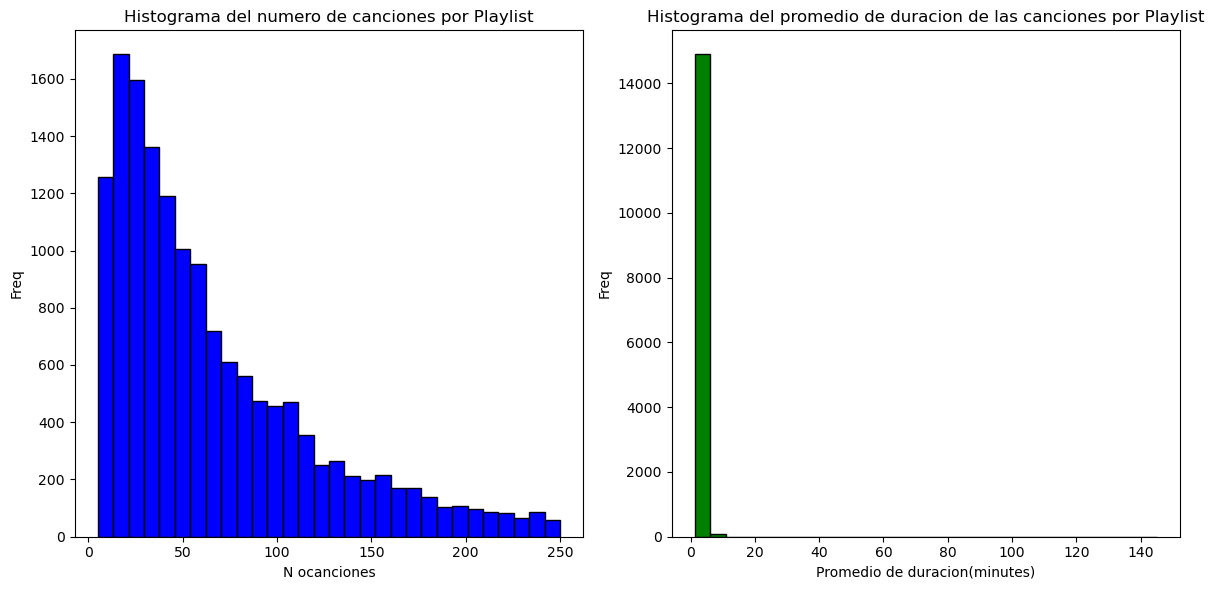

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Primer subplot para 'num_songs'
ax1.hist(by_playlist['num_songs'], bins=30, color='blue', edgecolor='black')
ax1.set_title('Histograma del numero de canciones por Playlist')
ax1.set_xlabel('N ocanciones')
ax1.set_ylabel('Freq')

# Segundo subplot para 'avg_duration'
ax2.hist(by_playlist['avg_duration'], bins=30, color='green', edgecolor='black')
ax2.set_title('Histograma del promedio de duracion de las canciones por Playlist')
ax2.set_xlabel('Promedio de duracion(minutes)')
ax2.set_ylabel('Freq')

# Ajustar el layout para evitar la superposición de elementos
plt.tight_layout()

# Mostrar la figura con ambos subplots
plt.show()

In [19]:
n_artists = len(expanded_tracks_df["artist_name"].unique())
n_albums = len(expanded_tracks_df["album_name"].unique())
n_songs = len(expanded_tracks_df["track_uri"].unique())

print(f"Número de artistas únicos: {n_artists}, Número de canciones únicas: {n_songs}, Número de albumes únicos: {n_albums}")

Número de artistas únicos: 44120, Número de canciones únicas: 222186, Número de albumes únicos: 87294


In [20]:
playlist_per_song = expanded_tracks_df.groupby('track_uri')['pid'].agg(list).reset_index()
playlist_per_song.head()

,track_uri,pid
0,spotify:track:000JBgYWfJQqdFaRqu2n3f,[11052]
1,spotify:track:000xQL6tZNLJzIrtIgxqSl,"[696134, 696175, 696199, 696524, 349103, 34922..."
2,spotify:track:0010mZpCCwlPwoBiBsjoac,"[349502, 451612, 451820, 102783]"
3,spotify:track:0017SUjqpHwX8SwjnwhsXG,[746830]
4,spotify:track:0018QzCxmMrpa0FubbNdak,[102452]


- Pasamos los URL a un id de cancion

In [21]:
url_id = {}
n = 1

def key_exists(key, dictionary):
    try:
        value = dictionary[key]
        return True
    except KeyError:
        return False

def get_id(x, n):
    if not key_exists(x, url_id):
        url_id[x] = n
        n += 1
    return url_id[x], n

values = []

for val in playlist_per_song["track_uri"]:
    valu, n = get_id(val, n)
    values.append(valu)

playlist_per_song["track_id"] = values
playlist_per_song.head()

,track_uri,pid,track_id
0,spotify:track:000JBgYWfJQqdFaRqu2n3f,[11052],1
1,spotify:track:000xQL6tZNLJzIrtIgxqSl,"[696134, 696175, 696199, 696524, 349103, 34922...",2
2,spotify:track:0010mZpCCwlPwoBiBsjoac,"[349502, 451612, 451820, 102783]",3
3,spotify:track:0017SUjqpHwX8SwjnwhsXG,[746830],4
4,spotify:track:0018QzCxmMrpa0FubbNdak,[102452],5


In [22]:
expanded_tracks_df["track_id"] = expanded_tracks_df["track_uri"].apply(lambda x: url_id[x])

In [23]:
expanded_tracks_df

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,pid,track_id
0,0,Drake,spotify:track:7JXZq0JgG2zTrSOAgY8VMC,spotify:artist:3TVXtAsR1Inumwj472S9r4,Jungle,spotify:album:0ptlfJfwGTy0Yvrk14JK1I,320400,If You're Reading This It's Too Late,696000,208640
1,1,Mario,spotify:track:5xV0Czdqefft6sPDqjmFBu,spotify:artist:20s0P9QLxGqKuCsGwFsp7w,Let Me Love You,spotify:album:332c3yPZilz3OnqZKpRxl7,248825,Turning Point,696000,169934
2,2,Miguel,spotify:track:5hJFhO9dvhJoDvUZZ9iWSw,spotify:artist:360IAlyVv4PCEVjgyMZrxK,Adorn,spotify:album:4Rvzx3X6hcDb7nty1IzVP4,193146,Kaleidoscope Dream (Deluxe Version),696000,162593
3,3,Ginuwine,spotify:track:3pfXxHoydFRfD7IBGJTQAN,spotify:artist:7r8RF1tN2A4CiGEplkp1oP,Pony,spotify:album:3O2912EZv0FBJKZ0K5ruzK,251733,R&B: From Doo-Wop To Hip-Hop,696000,109439
4,4,Mariah Carey,spotify:track:2H1l4JczUDbiWfQtQElB05,spotify:artist:4iHNK0tOyZPYnBU7nGAgpQ,Touch My Body,spotify:album:7JXUd8N7OXYQz981E5Jaq2,204733,E=MC²,696000,65076
...,...,...,...,...,...,...,...,...,...,...
987824,100,Usher,spotify:track:4356Typ82hUiFAynbLYbPn,spotify:artist:23zg3TcAtWQy7J6upgbUnj,DJ Got Us Fallin' In Love,spotify:album:6A1F3Fkq5dYeYYNkXflcTX,220800,Raymond v Raymond (Deluxe Edition),260999,115589
987825,101,LMFAO,spotify:track:7mitXLIMCflkhZiD34uEQI,spotify:artist:3sgFRtyBnxXD5ESfmbK4dl,Party Rock Anthem,spotify:album:0D49RvtlLCKyxeDKDnBU2R,262146,Sorry For Party Rocking,260999,216125
987826,102,Jay Sean,spotify:track:6cmm1LMvZdB5zsCwX5BjqE,spotify:artist:4pADjHPWyrlAF0FA7joK2H,Down,spotify:album:2H66HrVR1UeMlAoSXpxUnk,212506,All Or Nothing,260999,188810
987827,103,Mike Posner,spotify:track:495O1Affo7AurEPQcvcr18,spotify:artist:2KsP6tYLJlTBvSUxnwlVWa,Cooler Than Me - Single Mix,spotify:album:2V7Z0e4YnXyNfpoK3cYIGp,213293,31 Minutes to Takeoff,260999,118366


In [24]:
by_playlist["track_id"] = by_playlist["songs"].apply(lambda x: [url_id[val] for val in list(x)])
by_playlist.head()

,num_songs,avg_duration,artists,songs,albums,track_id
pid,,,,,,
11000,46,3.792417,"{The Killers, One Direction, Passenger, Vitami...","{spotify:track:1TfAhjzRBWzYZ8IdUV3igl, spotify...","{August And Everything After, Glee: The Music,...","[42173, 97670, 182362, 73352, 136055, 8178, 95..."
11001,62,3.913556,"{Lupe Fiasco, 50 Cent, Biz Markie, Eminem, Chi...","{spotify:track:2Lg4kvhOrPhpGEZmSe7VAN, spotify...","{Rolling Papers, Get Rich Or Die Tryin', Sitti...","[67275, 15502, 170714, 78999, 220676, 179935, ..."
11002,36,4.911985,"{Telekinesis, Merl Saunders, Phantogram, Risin...","{spotify:track:6VKftuH1BioMRn0LbUkv3b, spotify...","{III, Callin' out 12"", Hold My Home, II, Magni...","[185377, 51531, 39498, 159787, 30858, 157423, ..."
11003,45,4.421719,"{Disney Characters, Bobby ""Boris"" Pickett & Th...","{spotify:track:69QHm3pustz01CJRwdo20z, spotify...","{Astro Creep: 2000 Songs Of Love, Destruction ...","[175363, 155455, 140554, 132425, 3556, 26757, ..."
11004,48,3.826138,"{Tijuana Panthers, Sky Ferreira, Deerhoof, Boy...","{spotify:track:4lMTBkNmwQPDQgUzBXmhMA, spotify...","{Where the Heaven Are We, Stonecold, Atelophob...","[135876, 222122, 214353, 199169, 158324, 76000..."


In [25]:
playlist_per_song['n_playlists'] = playlist_per_song['pid'].apply(lambda x: len(set(x)))

In [26]:
playlist_per_song["n_playlists"].mean()

4.387324133833815

In [27]:
cancion_mas_reproducida = playlist_per_song["n_playlists"].idxmax()
playlist_per_song.iloc[cancion_mas_reproducida]

track_uri                   spotify:track:7KXjTSCq5nL1LoYtL7XAwS
pid            [696019, 696108, 696167, 696170, 696182, 69622...
track_id                                                  209109
n_playlists                                                  674
Name: 209108, dtype: object

In [28]:
playlist_per_song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222186 entries, 0 to 222185
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   track_uri    222186 non-null  object
 1   pid          222186 non-null  object
 2   track_id     222186 non-null  int64 
 3   n_playlists  222186 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 6.8+ MB


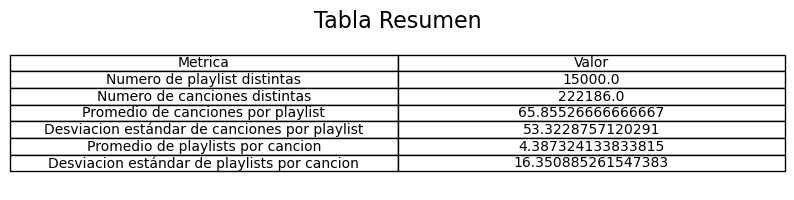

In [29]:
metricas = {
    'Metrica': ['Numero de playlist distintas', 'Numero de canciones distintas',
                'Promedio de canciones por playlist', 'Desviacion estándar de canciones por playlist',
                'Promedio de playlists por cancion', 'Desviacion estándar de playlists por cancion'],
    'Valor': [by_playlist.shape[0], n_songs, by_playlist["num_songs"].mean(), by_playlist["num_songs"].std(), 
              playlist_per_song["n_playlists"].mean(), playlist_per_song["n_playlists"].std()]
}

df = pd.DataFrame(metricas)

fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')
tabla = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colWidths=[0.5, 0.5])
plt.title('Tabla Resumen', fontsize=16)
plt.show()

# 2. Baseline

In [30]:
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares
from implicit.bpr import BayesianPersonalizedRanking
from implicit.evaluation import mean_average_precision_at_k, ndcg_at_k

c:\Users\jasar\anaconda3\envs\Recomendadores\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
#Hay playlist que tienen la misma cancion más de una vez, aca las tratamos solo una vez
playlist_track = expanded_tracks_df[["pid","track_id","track_name","duration_ms","artist_name"]].drop_duplicates()
playlist_track.head()

,pid,track_id,track_name,duration_ms,artist_name
0,696000,208640,Jungle,320400,Drake
1,696000,169934,Let Me Love You,248825,Mario
2,696000,162593,Adorn,193146,Miguel
3,696000,109439,Pony,251733,Ginuwine
4,696000,65076,Touch My Body,204733,Mariah Carey


- Separamos en data de validación y data de entrenamiento

In [32]:
# elegimos el 60% de las playlist para entrenar el modelo
# Calcular el 60% del tamaño de la lista
num_elementos = int(0.6 * len(list(playlist_track["pid"].unique())))

pid_train = random.sample(list(playlist_track["pid"].unique()), num_elementos)

In [33]:
playlist_track_train = playlist_track[playlist_track['pid'].isin(pid_train)]
playlist_track_val = playlist_track[~playlist_track['pid'].isin(pid_train)]

In [34]:
playlist_track_train.shape[0] + playlist_track_val.shape[0] == playlist_track.shape[0]

True

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder_customers = LabelEncoder()
playlist_id_encoded_train = label_encoder_customers.fit_transform(playlist_track_train['pid'])
playlist_id_encoded_val = label_encoder_customers.fit_transform(playlist_track_val['pid'])

label_encoder_articles = LabelEncoder()
song_id_encoded_train = label_encoder_articles.fit_transform(playlist_track_train['track_id'])
song_id_encoded_val = label_encoder_articles.fit_transform(playlist_track_val['track_id'])

interacciones_train = csr_matrix((np.ones(playlist_track_train.shape[0]), (playlist_id_encoded_train, song_id_encoded_train)))
interacciones_val = csr_matrix((np.ones(playlist_track_val.shape[0]), (playlist_id_encoded_val, song_id_encoded_val)))


def evaluar_als(dimension):
    modelo = AlternatingLeastSquares(factors=dimension)
    modelo.fit(interacciones_train)
    mapk = mean_average_precision_at_k(modelo, train_user_items=interacciones_train, test_user_items=interacciones_val, K=10)
    ndcgk = ndcg_at_k(modelo, train_user_items=interacciones_train, test_user_items=interacciones_val, K=10)
    return mapk, ndcgk

def evaluar_bpr(dimension):
    modelo = BayesianPersonalizedRanking(factors=dimension)
    modelo.fit(interacciones_train)
    mapk = mean_average_precision_at_k(modelo, train_user_items=interacciones_train, test_user_items=interacciones_val, K=10)
    ndcgk = ndcg_at_k(modelo, train_user_items=interacciones_train, test_user_items=interacciones_val, K=10)
    return mapk, ndcgk

In [36]:
dimensiones = [50, 100, 200, 500, 1000]

resultados_als = {}
resultados_bpr = {}

for dimension in dimensiones:
    mapk_als, ndcgk_als = evaluar_als(dimension)
    mapk_bpr, ndcgk_bpr = evaluar_bpr(dimension)

    resultados_als[dimension] = [mapk_als, ndcgk_als]
    resultados_bpr[dimension] = [mapk_bpr, ndcgk_bpr]

c:\Users\jasar\anaconda3\envs\Recomendadores\lib\site-packages\implicit\cpu\als.py:95: RuntimeWarning: OpenBLAS is configured to use 8 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()
c:\Users\jasar\anaconda3\envs\Recomendadores\lib\site-packages\implicit\cpu\als.py:95: RuntimeWarning: Intel MKL BLAS is configured to use 4 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'MKL_NUM_THREADS=1' or by callng 'threadpoolctl.threadpool_limits(1, "blas")'. Having MKL use a threadpool can lead to severe performance issues
  check_blas_config()
100%|██████████| 6000/6000 [00:29<00:00, 206.83it/s]


In [37]:
resultados_als

{50: [0.00014936507936507933, 0.0004694127955577701],
 100: [0.0001530489417989418, 0.00047874712665361117],
 200: [0.00019390211640211633, 0.0005841598724004374],
 500: [9.98015873015873e-05, 0.0003473218347052563],
 1000: [9.251322751322751e-05, 0.0003251775935895362]}

In [38]:
resultados_bpr

{50: [0.00011767857142857146, 0.00040023567849404337],
 100: [0.00015439153439153437, 0.000430819880445541],
 200: [0.0001761640211640211, 0.000548473526347915],
 500: [0.0001443915343915344, 0.00045408707018909135],
 1000: [0.00011824074074074074, 0.00039493578298285527]}

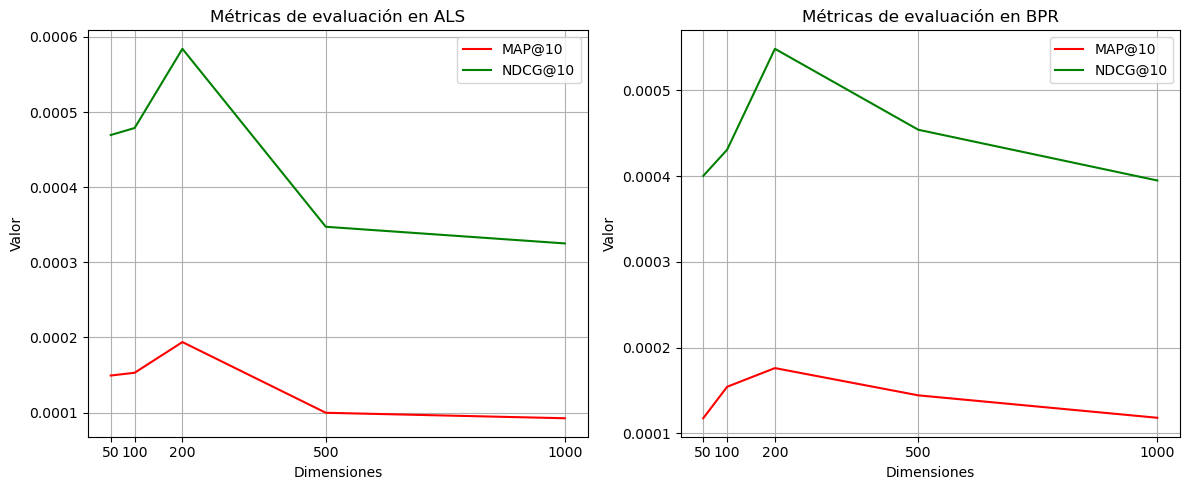

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Gráfico para ALS
axs[0].plot(dimensiones, [resultados_als[i][0] for i in dimensiones], label='MAP@10', color='red')
axs[0].plot(dimensiones, [resultados_als[i][1] for i in dimensiones], label='NDCG@10', color='green')
axs[0].set_title('Métricas de evaluación en ALS')
axs[0].set_xlabel('Dimensiones')
axs[0].set_ylabel('Valor')
axs[0].legend()
axs[0].set_xticks(dimensiones)
axs[0].grid(True)

# Gráfico para BPR
axs[1].plot(dimensiones, [resultados_bpr[i][0] for i in dimensiones], label='MAP@10', color='red')
axs[1].plot(dimensiones, [resultados_bpr[i][1] for i in dimensiones], label='NDCG@10', color='green')
axs[1].set_title('Métricas de evaluación en BPR')
axs[1].set_xlabel('Dimensiones')
axs[1].set_ylabel('Valor')
axs[1].legend()
axs[1].set_xticks(dimensiones)
axs[1].grid(True)

plt.tight_layout() 
plt.show()

# Item- Item

In [40]:
playlist_track_train

,pid,track_id,track_name,duration_ms,artist_name
186,696001,218579,Jimmy Choo,176855,Fetty Wap
187,696001,4216,Planez,240320,Jeremih
188,696001,108327,Waves,181573,Kanye West
189,696001,28589,Really Really,232093,Kevin Gates
190,696001,32986,Famous,196040,Kanye West
...,...,...,...,...,...
987824,260999,115589,DJ Got Us Fallin' In Love,220800,Usher
987825,260999,216125,Party Rock Anthem,262146,LMFAO
987826,260999,188810,Down,212506,Jay Sean
987827,260999,118366,Cooler Than Me - Single Mix,213293,Mike Posner


In [41]:
import tensorflow_hub as hub
import tensorflow as tf

In [42]:
modelo_use = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

Calculamos un embedding de texto para cada item (cancion) utilizando la info de su nombre (que info usaremos) mediante Universal Sentence Encoding

In [43]:
songs_embeddings = []

for i, row in playlist_track_train.iterrows():
    embedding = modelo_use([row['track_name']])
    songs_embeddings.append(embedding[0])

In [44]:
tensor = tf.convert_to_tensor(songs_embeddings)

In [45]:
from sklearn.decomposition import PCA

pca_10 = PCA(n_components=10, whiten=True)
X_pca_10 = pca_10.fit_transform(tensor.numpy())

In [46]:
def obtener_vec_item(X_n):
  items = []
  for i in range(X_n.shape[0]):
    vec_item = X_n[i]
    prod_norm = np.linalg.norm(vec_item)
    items.append((vec_item, prod_norm))
  return items

In [47]:
vectores_tracks_dim10 = obtener_vec_item(X_pca_10)

- Similaridad del Coseno

In [48]:
def simCos_per_item(v_item, prods_n):
  u_norm = np.linalg.norm(v_item)
  cosine_similarities = []
  for vec_item, item_norm in prods_n:
      cosine_similarity = np.dot(vec_item, v_item) / (item_norm * u_norm)
      cosine_similarities.append(cosine_similarity)
  return cosine_similarities

In [49]:
def batch_cosine_similarity(v_item, all_items, batch_size=1000):
    # Esta función calcula la similitud del coseno en lotes para evitar problemas de memoria
    start_idx = 0
    cosine_similarities = np.zeros(len(all_items))
    
    while start_idx < len(all_items):
        end_idx = min(start_idx + batch_size, len(all_items))
        batch = np.array([item[0] for item in all_items[start_idx:end_idx]])
        u_norm = np.linalg.norm(v_item)
        norms = np.linalg.norm(batch, axis=1)
        cosine_similarities[start_idx:end_idx] = np.dot(batch, v_item) / (norms * u_norm)
        start_idx = end_idx
    
    return cosine_similarities

# Ejemplo de uso:
# Similitud del primer item contra todos en lotes
similarities = batch_cosine_similarity(vectores_tracks_dim10[0][0], vectores_tracks_dim10)

In [69]:
len(similarities)

578908

In [80]:
def find_song_indices(track_name, artist_name, dataframe):
    """ Encuentra todos los índices de una canción específica basada en el nombre de la pista y el nombre del artista. """
    return dataframe[(dataframe['track_name'] == track_name) & (dataframe['artist_name'] == artist_name)].index.tolist()

def recommend_songs_batch(song_index, all_vectors, dataframe, top_n=5):
    track_name = dataframe.iloc[song_index]['track_name']
    artist_name = dataframe.iloc[song_index]['artist_name']

    song_vector = all_vectors[song_index][0]
    similarities = batch_cosine_similarity(song_vector, all_vectors)

    dataframe = dataframe.reset_index()
    
    # Obtener índices de todas las instancias de la canción actual
    song_indices = find_song_indices(track_name, artist_name, dataframe)
    for idx in song_indices:
        similarities[idx] = -np.inf  # Establece la similitud como infinito negativo

    similar_indices = np.argsort(-similarities)
    return similar_indices[:top_n]

# Hacer recomendaciones para la primera canción
recommended_indices = recommend_songs_batch(3,vectores_tracks_dim10, playlist_track_train)
print("Índices de canciones recomendadas:", recommended_indices)

Índices de canciones recomendadas: [448897 119823 257122 155523 555279]


In [77]:
playlist_track_train

,pid,track_id,track_name,duration_ms,artist_name
186,696001,218579,Jimmy Choo,176855,Fetty Wap
187,696001,4216,Planez,240320,Jeremih
188,696001,108327,Waves,181573,Kanye West
189,696001,28589,Really Really,232093,Kevin Gates
190,696001,32986,Famous,196040,Kanye West
...,...,...,...,...,...
987824,260999,115589,DJ Got Us Fallin' In Love,220800,Usher
987825,260999,216125,Party Rock Anthem,262146,LMFAO
987826,260999,188810,Down,212506,Jay Sean
987827,260999,118366,Cooler Than Me - Single Mix,213293,Mike Posner


In [81]:
playlist_track_train.reset_index().iloc[448897]

index                 767705
pid                   374635
track_id                1176
track_name     REALLY REALLY
duration_ms           203056
artist_name           WINNER
Name: 448897, dtype: object